<a href="https://colab.research.google.com/github/sinha101/Transportation_management_system/blob/master/Respiratory_system_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/Colab Notebooks/chest_xray/"
train_dir = base_dir + "train/"
test_dir = base_dir + "test/"

train_dir_n = train_dir + "NORMAL/"
train_dir_p = train_dir + "PNEUMONIA/"

test_dir_n = test_dir + "NORMAL/"
test_dir_p = test_dir + "PNEUMONIA/"

In [ ]:
print("Normal Training images:", len(os.listdir(train_dir_n)))
print("Normal Testing images:", len(os.listdir(test_dir_n)))

Normal Training images: 1341
Normal Testing images: 234


In [ ]:
print("Pneumonia Training images:", len(os.listdir(train_dir_p)))
print("Pneumonia Testing images:", len(os.listdir(test_dir_p)))

Pneumonia Training images: 3875
Pneumonia Testing images: 390


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
norm_img = Image.open(train_dir_n + os.listdir(train_dir_n)[0])
pne_img = Image.open(train_dir_p + os.listdir(train_dir_p)[0])

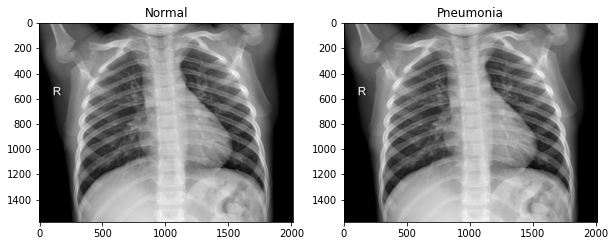

In [ ]:
fg = plt.figure(figsize=(10,10))
plot1 = fg.add_subplot(1,2,1)
plot1.set_title('Normal')
plt.imshow(norm_img, cmap = 'gray')

plot2 = fg.add_subplot(1,2,2)
plot2.set_title('Pneumonia')
plt.imshow(norm_img, cmap = 'gray')



In [ ]:
IMG_SIZE = (400,400)
#Convert it intoGrayscale
#Convert it into numpy

In [ ]:
from PIL import ImageOps

def reshape_img(img):
    return img.resize(IMG_SIZE, Image.LANCZOS)

def convert_to_grayscale(img):
    return ImageOps.grayscale(img)



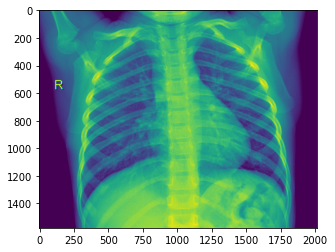

In [ ]:
plt.imshow(reshape_img(norm_img))
plt.imshow(convert_to_grayscale(norm_img))

In [ ]:
def transform_image(img_path):
   #Load
    img = Image.open(img_path)
   #Resize
    img = reshape_img(img)
    #To grayscale   
    img = convert_to_grayscale(img)
    #to numpy
    return np.array(img)

def load_image_files(img_paths):
    image_array = []
    for img_path in img_paths:
        np_img = transform_image(img_path)
        image_array.append(np_img)
        
    return np.array(image_array)

In [ ]:
train_np_n = load_image_files([(train_dir_n + f) for f in os.listdir(train_dir_n)])
train_np_p =  load_image_files([(train_dir_p + f) for f in os.listdir(train_dir_p)])

test_np_n = load_image_files([(test_dir_n + f) for f in os.listdir(test_dir_n)])
test_np_p =  load_image_files([(test_dir_p + f) for f in os.listdir(test_dir_p)])

print("Train normal:", train_np_n.shape)
print("Train pneumonia:", train_np_p.shape)
print("Test normal:", test_np_n.shape)
print("Test pneumonia:", test_np_p.shape)

Train normal: (1341, 400, 400)
Train pneumonia: (3875, 400, 400)
Test normal: (234, 400, 400)
Test pneumonia: (390, 400, 400)


In [ ]:
# Target labels
NORM = 0
PNEU = 1

In [ ]:
train_np_n_target = np.full((train_np_n.shape[0],1), NORM)
train_np_p_target = np.full((train_np_p.shape[0],1), PNEU)
test_np_n_target = np.full((test_np_n.shape[0],1), NORM)
test_np_p_target = np.full((test_np_p.shape[0],1), PNEU)

In [ ]:
#Combine all the training examples into one numpy array
#Combine all the training target labeles into one numpy array
#Combine all the testing examples into one numpy array
#Combine all the testing target labeles into one numpy array

train_np_x = np.concatenate((train_np_n, train_np_p), axis=0)
train_np_y = np.concatenate((train_np_n_target, train_np_p_target), axis=0)
test_np_x = np.concatenate((test_np_n, test_np_p), axis=0)
test_np_y = np.concatenate((test_np_n_target, test_np_p_target), axis=0)

In [ ]:
#Optionally
#del train_np_n
#del train_np_p
#del test_np_n
#del tet_np_p

In [ ]:
#Flatten out the 2d image data into 1d vector
train_size = train_np_x.shape[0]
test_size = test_np_x.shape[0]
train_np_x = train_np_x.reshape((train_size, -1))
test_np_x = test_np_x.reshape((test_size, -1))
print('Train shape:', train_np_x.shape)
print('Test shape:', test_np_x.shape)

Train shape: (5216, 160000)
Test shape: (624, 160000)


In [ ]:
train_np_x.shape

(5216, 160000)

In [ ]:
#Train and eval
from sklearn.linear_model import SGDClassifier
classifier_1 = SGDClassifier()
classifier_1.fit(train_np_x, train_np_y.reshape(-1))

SGDClassifier()

In [ ]:
#Evaluate
predicted_y = classifier_1.predict(test_np_x)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
actual_y = test_np_y.reshape(-1)
print('Accuracy score:', accuracy_score(actual_y, predicted_y))

Accuracy score: 0.7756410256410257


In [ ]:
print('classification report:', classification_report(actual_y, predicted_y))

classification report:               precision    recall  f1-score   support

           0       0.95      0.42      0.59       234
           1       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.85      0.71      0.72       624
weighted avg       0.82      0.78      0.75       624



In [ ]:
print('confusion matrix:', confusion_matrix(actual_y, predicted_y))

confusion matrix: [[ 99 135]
 [  5 385]]


In [ ]:
classifier_2 = SGDClassifier(loss= 'log', max_iter=20, random_state=100)
classifier_2.fit(train_np_x, train_np_y.reshape(-1))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=20, random_state=100)

In [ ]:
predicted_y = classifier_2.predict(test_np_x)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
actual_y = test_np_y.reshape(-1)
print('Accuracy score:', accuracy_score(actual_y, predicted_y))

Accuracy score: 0.7516025641025641


In [ ]:
print('classification report:', classification_report(actual_y, predicted_y))

classification report:               precision    recall  f1-score   support

           0       0.93      0.36      0.52       234
           1       0.72      0.98      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.68       624
weighted avg       0.80      0.75      0.72       624



In [ ]:
print('confusion matrix:', confusion_matrix(actual_y, predicted_y))

confusion matrix: [[ 85 149]
 [  6 384]]
